In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [3]:
# Define the data path and Load dataset
data_path = '../Datasets/pneumoniamnist.npz'
pneumoniamnist = np.load(data_path)

# Seperate the dataset
train_images = pneumoniamnist['train_images']
train_labels = pneumoniamnist['train_labels']

val_images = pneumoniamnist['val_images']
val_labels = pneumoniamnist['val_labels']

test_images = pneumoniamnist['test_images']
test_labels = pneumoniamnist['test_labels']


In [4]:
def preprocess_dataset(images, labels):
    #Flatten the image array
    flattened_images = images.reshape(images.shape[0], -1)
    # Conver to 1-dimension
    labels = labels.ravel()
    return flattened_images, labels

train_images, train_labels = preprocess_dataset(train_images, train_labels)
val_images, val_labels = preprocess_dataset(val_images, val_labels)
test_images, test_labels = preprocess_dataset(test_images, test_labels)

In [5]:
# Set value of n_estimators(number of tree) from 70 to 130, gap:10
n_estimators_range = range(70, 131, 10)

# For store validation accuracy in each n
val_accuracies = []

# Iteration
for n_estimators in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    # Train
    clf.fit(train_images, train_labels)
    
    # predict and record the accuracy
    predicted_val_labels = clf.predict(val_images)
    val_accuracy = accuracy_score(val_labels, predicted_val_labels)

    val_accuracies.append(val_accuracy)

    print(f"n_estimators: {n_estimators}, Validation Accuracy: {val_accuracy}")



n_estimators: 70, Validation Accuracy: 0.9637404580152672
n_estimators: 80, Validation Accuracy: 0.9599236641221374
n_estimators: 90, Validation Accuracy: 0.9599236641221374
n_estimators: 100, Validation Accuracy: 0.9656488549618321
n_estimators: 110, Validation Accuracy: 0.9599236641221374
n_estimators: 120, Validation Accuracy: 0.9618320610687023
n_estimators: 130, Validation Accuracy: 0.9580152671755725


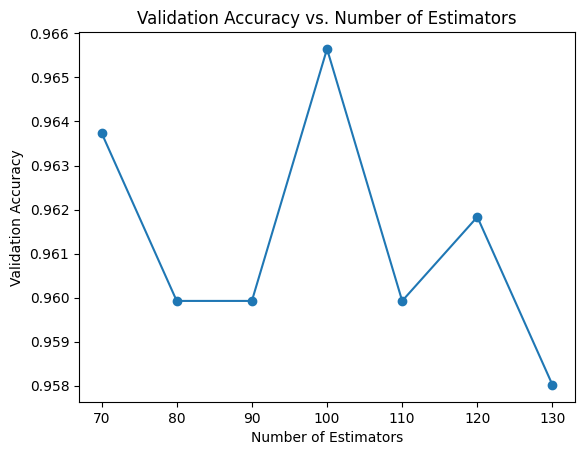

In [6]:
# Plot the change of validation accuracy in different tree numbers
plt.plot(n_estimators_range, val_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Estimators')
plt.savefig("Validation Accuracy vs. Number of Estimators.png")
plt.show()

In [7]:
# Choose 100 as the final number of estimators
clf_final = RandomForestClassifier(n_estimators = 100, random_state=42)

# Train the model
clf_final.fit(train_images, train_labels)

# Use Cross-validation to evaluate the model
scores = cross_val_score(clf, train_images, train_labels, cv=5)
print("Average cross-validation score: ", scores.mean())

# Predict the Test dataset
predicted_labels = clf_final.predict(test_images)
print("The Accuracy of test dataset:", accuracy_score(test_labels, predicted_labels))

Average cross-validation score:  0.9488094835191365
The Accuracy of test dataset: 0.8525641025641025


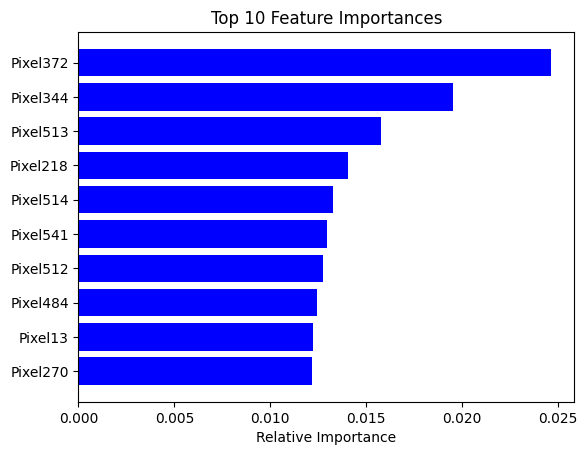

In [8]:

importances = clf_final.feature_importances_
# display the top 10 features
top_features = 10  

# Get the index of the most 10 important features
indices = np.argsort(importances)[-top_features:]

plt.figure() 
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), ['Pixel' + str(i) for i in indices])
plt.xlabel('Relative Importance')
plt.savefig("Top 10 Feature Importances.png")